In [1]:
import json
import matplotlib.pyplot as plt

import bluepyopt as bpopt
import bluepyopt.ephys as ephys

import model
import evaluator
import time

import sys

from pathlib import Path

In [2]:
#!rm -rf x86_64
#!nrnivmodl mechanisms

In [3]:
probe = None #model.define_electrode(probe_type="linear")
model_name = 'hallermann' # "hay" 
morph_modifier = 'hallermann' # ""

In [4]:
cell = model.create(model=model_name, morph_modifier=morph_modifier, release=True)

param_names = [param.name for param in cell.params.values() if not param.frozen]

fitness_protocols = evaluator.define_protocols(
    model_name,
    feature_set="multiple",
    feature_file="hallermann_model/features_list.json",
    electrode=probe,
    protocols_with_lfp=None
)

fitness_calculator = ephys.objectivescalculators.ObjectivesCalculator([])
if model_name == 'hallermann':
    sim = ephys.simulators.LFPySimulator(cell, cvode_active=False, electrode=probe)
else:
    sim = ephys.simulators.LFPySimulator(cell, cvode_active=True, electrode=probe)
    
eva = ephys.evaluators.CellEvaluator(                    
        cell_model=cell,                                                       
        param_names=param_names,                                                    
        fitness_protocols=fitness_protocols,                                        
        fitness_calculator=fitness_calculator,                                      
        sim=sim)

In [5]:
fitness_protocols

{'Step1': <bluepyopt.ephys.protocols.SweepProtocol at 0x7ff813d70190>}

In [6]:
t_start = time.time()
responses = eva.run_protocols(protocols=fitness_protocols.values(), param_values={})
print(f"Elapsed time: {time.time() - t_start}")

hallermann[0].axon[0](0.45)
ih Ih 0.0
ih gbar 0.00015
ih h 0.0
ca_ion cai 5e-05
ca_ion cao 2.0
ca_ion dica_dv_ 0.0
ca_ion eca 132.4579341637009
ca_ion ica 0.0
k_ion dik_dv_ 0.0
k_ion ek -98.0
k_ion ik 0.0
k_ion ki 54.4
k_ion ko 2.5
kca gbar 0.1
kca gkca 0.0
kca ikca 0.0
kca n 0.0
kca ninf 0.0
kca ntau 0.0
it2 gcaT 0.0
it2 gcabar 0.0
it2 h 0.0
it2 hinf 0.0
it2 htau 0.0
it2 icaT 0.0
it2 m 0.0
it2 minf 0.0
it2 mtau 0.0
ca gbar 0.0
ca gcaH 0.0
ca h 0.0
ca hinf 0.0
ca htau 0.0
ca icaH 0.0
ca m 0.0
ca minf 0.0
ca mtau 0.0
cad ca 0.0
cad taur 80.0
Kv7 gbar 1.4716972063997
Kv7 ik 0.0
Kv7 m 0.0
Kv1 gbar 1000.0
Kv1 gkv1 0.0
Kv1 h1 0.0
Kv1 h2 0.0
Kv1 ikv1 0.0
Kv1 n 0.0
na_ion dina_dv_ 0.0
na_ion ena 55.0
na_ion ina 0.0
na_ion nai 10.0
na_ion nao 140.0
na a1_0 45.8498
na a1_1 0.0239354
na a2_0 19.8084
na a2_1 0.0221771
na a3_0 71.8119
na a3_1 0.0659379
na ah_0 0.575782
na ah_1 162.841
na ah_2 0.0268011
na b1_0 0.0144095
na b1_1 0.0884761
na b2_0 0.565017
na b2_1 0.061084
na b3_0 0.753118
na b3_1 0

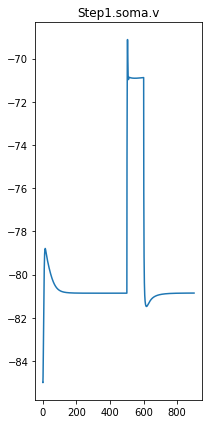

In [7]:
fig, axes = plt.subplots(len(responses), figsize=(3, 6), squeeze=False)
for index, (resp_name, response) in enumerate(sorted(responses.items())):
    axes[index, 0].plot(response['time'], response['voltage'], label=resp_name)
    axes[index, 0].set_title(resp_name)
fig.tight_layout()
fig.show()